## 1. Introduction 

#### XYZ Health Insurance Co. Ltd.
**Company Introduction**

**XYZ Health Insurance Co. Ltd.** is one of the prominent insurance providers in the country.
Offering impressive health plans and services to cater to the needs of different people.
The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.


**Current Scenario**

The company is planning to introduce a new system that will help to easily monitor and predict the medical insurance prices of their customers.


## 2. Problem Statement 
The current process suffers from the following problems:
- The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
- It is a time and resource-intensive process and many times, inaccurate.
- The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.

## 3.  Project Deliverables

- Deliverable: Predicts the medical charges of insurers.
- Machine Learning Task: Regression
- Target Variable: charges
- Win Condition: N/A (best possible model)


## 4.  Evaluation Metric
- The model evaluation will be based on the R2 score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset feature Description

|**Column Name**|**Description**|
|:--|:--
|**age**|Indicates the age of the primary beneficiary|
|**sex**|Indicates the gender of the insurance contractor|
|**bmi**|Indicates the BMI of the beneficiary|
|**children**|Indicates number of children covered by health insurance / Number of dependents|
|**smoker**|Indicates whether the beneficiary has smoking habits?|
|**region**|Indicates the region of residence of the beneficiary|
|**id**|Indicates the unique beneficiary id|
|**charges**|Indicates the individual medical costs billed by health insurance|

In [2]:
df_train= pd.read_csv('train_data.csv')
df_train.shape

(1003, 8)

In [3]:
df_train.head(4)

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820


In [4]:
df_test = pd.read_csv('test_data.csv')
df_test.shape

(335, 7)

In [5]:
df_test.head(4)

,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [9]:
df_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64

In [10]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
dtype: int64

In [11]:
df_train.describe(include='all')

,age,sex,bmi,children,smoker,region,id,charges
count,1003.000000,1003,1003.000000,1003.000000,1003,1003,1003.000000,1003.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,506,NaN,NaN,797,259,NaN,NaN
mean,39.255234,NaN,30.511780,1.104686,NaN,NaN,666.874377,13267.935817
std,14.039105,NaN,6.013107,1.204619,NaN,NaN,386.570442,12051.356547
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,0.000000,1121.873900
25%,27.000000,NaN,26.210000,0.000000,NaN,NaN,329.500000,4780.839400
50%,39.000000,NaN,30.200000,1.000000,NaN,NaN,675.000000,9447.382400
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,1001.500000,16840.667970


In [12]:
df_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
id            int64
charges     float64
dtype: object

In [13]:
df_train_copy = df_train.copy()

In [14]:
new_data = {'sex':{'male': 0, 'female': 1},
           'smoker':{'no':0, 'yes':1},
           'region':{'southeast':0, 'northeast':1,'southwest':2,'northwest':3}}


In [15]:
df_train_copy = df_train.copy()
df_train_copy.replace(new_data, inplace=True)

In [16]:
x= df_train_copy.corr()
x

,age,sex,bmi,children,smoker,region,id,charges
age,1.000000,0.012385,0.111325,0.055070,-0.037916,0.029759,-0.031710,0.293434
sex,0.012385,1.000000,-0.001931,-0.016610,-0.054671,-0.028190,0.020615,-0.043353
bmi,0.111325,-0.001931,1.000000,-0.003459,-0.001499,-0.168348,-0.028038,0.195828
children,0.055070,-0.016610,-0.003459,1.000000,0.025488,0.036752,0.034752,0.079823
smoker,-0.037916,-0.054671,-0.001499,0.025488,1.000000,-0.051925,0.024316,0.781981
region,0.029759,-0.028190,-0.168348,0.036752,-0.051925,1.000000,0.003401,-0.054976
id,-0.031710,0.020615,-0.028038,0.034752,0.024316,0.003401,1.000000,0.025468
charges,0.293434,-0.043353,0.195828,0.079823,0.781981,-0.054976,0.025468,1.000000


<Axes: >

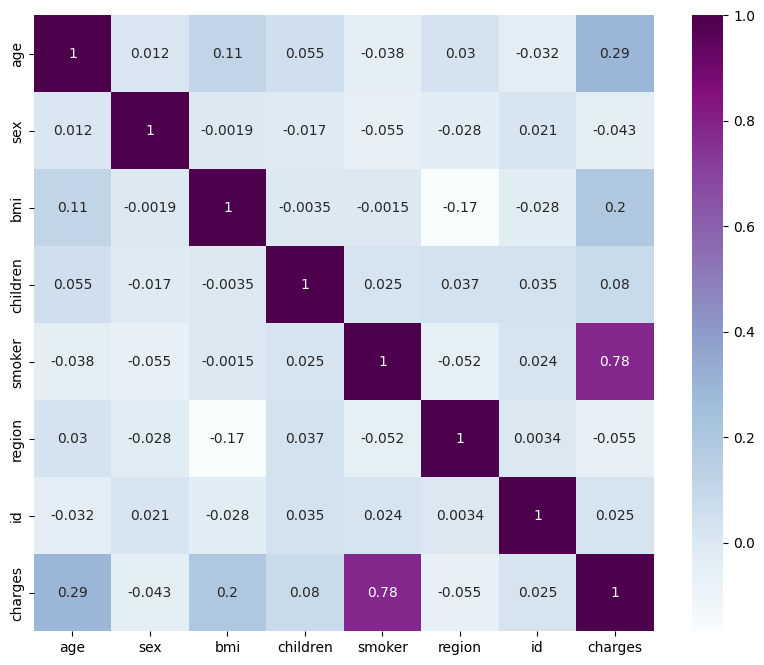

In [17]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(x, annot=True, cmap='BuPu')

###### Impact on health and life insurance premium
- Since smokers pose a greater risk of contacting this wide array of diseases mentioned above, it makes them more prone to health complications
- Most insurers will charge a higher premium amount for smokers compared to non-smokers
- Smokers are highly related with insurance charges

In [18]:
print(df_train['sex'].value_counts().sort_values()) 
print(df_train['smoker'].value_counts().sort_values())
print(df_train['region'].value_counts().sort_values())

sex
female    497
male      506
Name: count, dtype: int64
smoker
yes    206
no     797
Name: count, dtype: int64
region
northwest    246
southwest    247
northeast    251
southeast    259
Name: count, dtype: int64


#### 1. Region

###### A. Which region has the most number of beneficiaries in the training set?

In [20]:
df_train_copy['region'].value_counts()

region
0    259
1    251
2    247
3    246
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13296\3807777005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df_train_copy, palette='Set1')


<Axes: xlabel='region', ylabel='charges'>

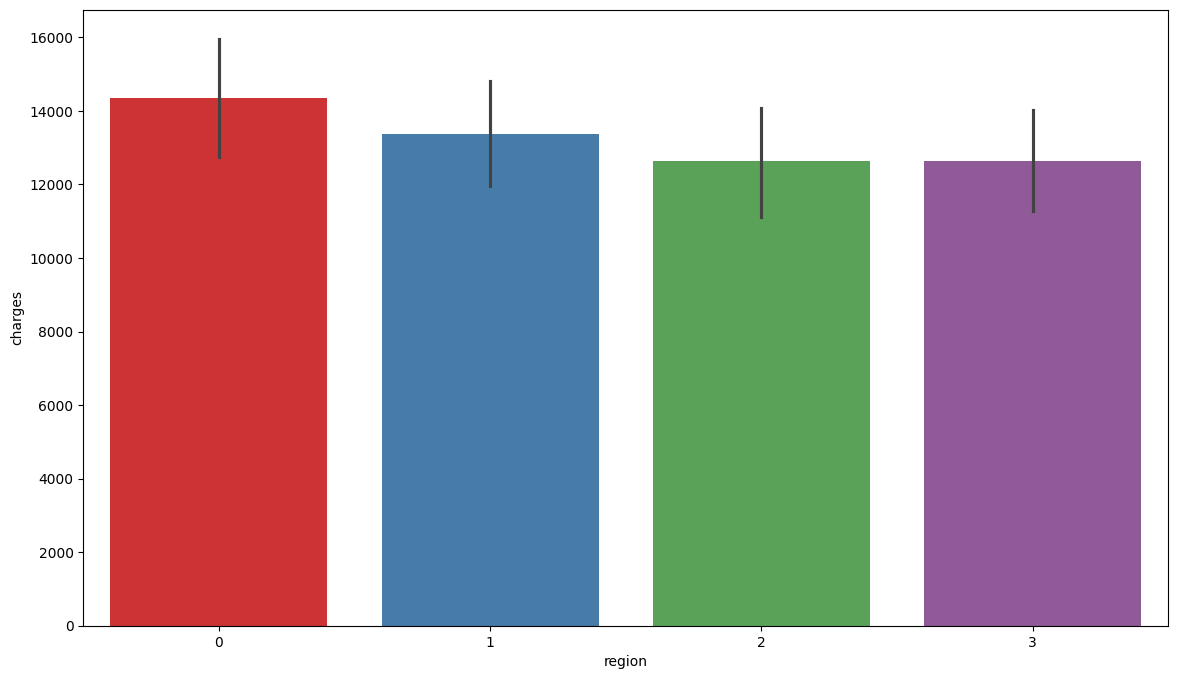

In [21]:
plt.figure(figsize=(14,8))
sns.barplot(x='region', y='charges', data=df_train_copy, palette='Set1')

- Southeast region has the most number of beneficiaries

###### B. Which region has highest and least number of smokers?

<Axes: xlabel='region', ylabel='smoker'>

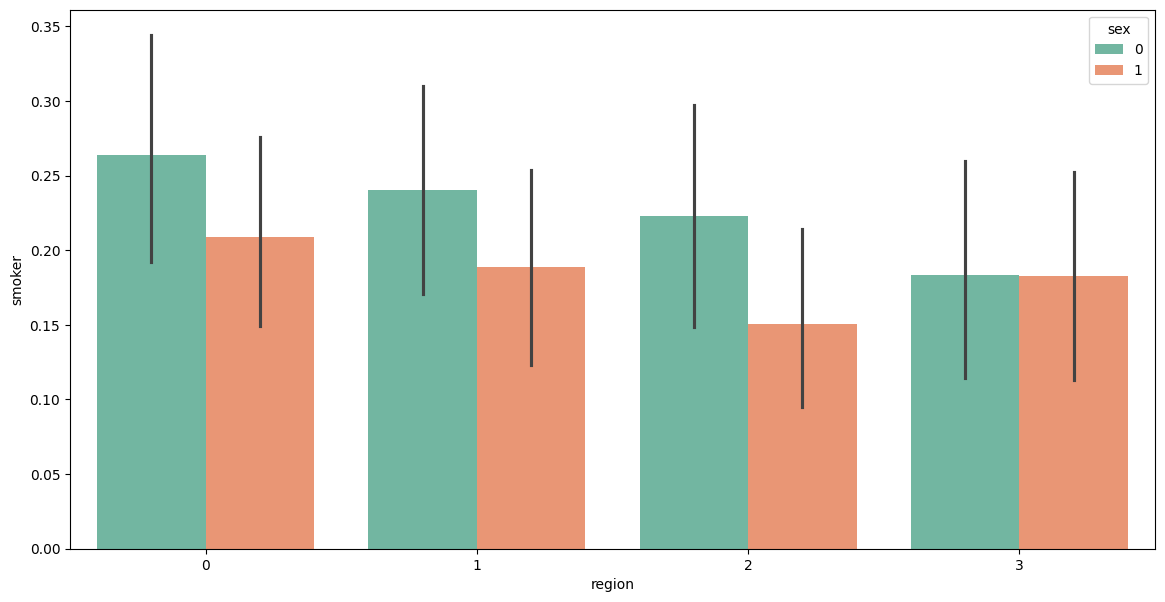

In [22]:
plt.figure(figsize=(14,7))
sns.barplot(x='region', y='smoker',hue='sex',data=df_train_copy, palette='Set2')

- Southeast region has the highest and northwest has the least number of smokers with males as prominent smokers

#### 2. Age

###### A. What's the mean and median value of the age feature?

In [23]:
df_train['age'].mean()

39.25523429710867

In [24]:
df_train['age'].median()

39.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13296\935845942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['age'])


<Axes: xlabel='age', ylabel='Density'>

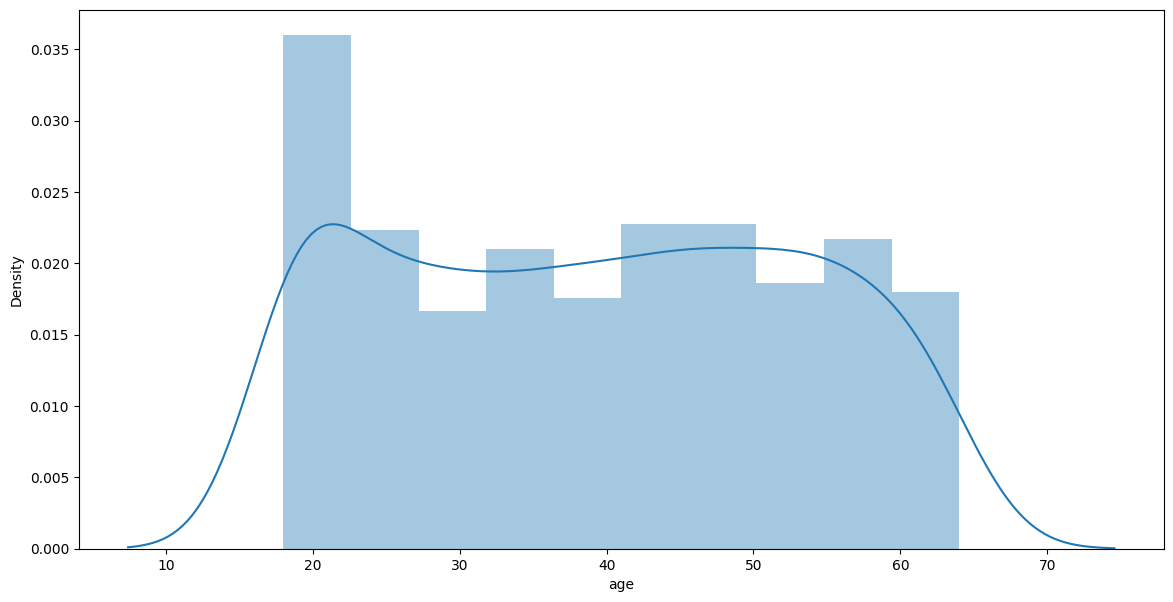

In [25]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['age'])

###### B. How age is related with the charges?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13296\2469180683.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='charges', data=df_train_copy, palette='Set3')


<Axes: xlabel='age', ylabel='charges'>

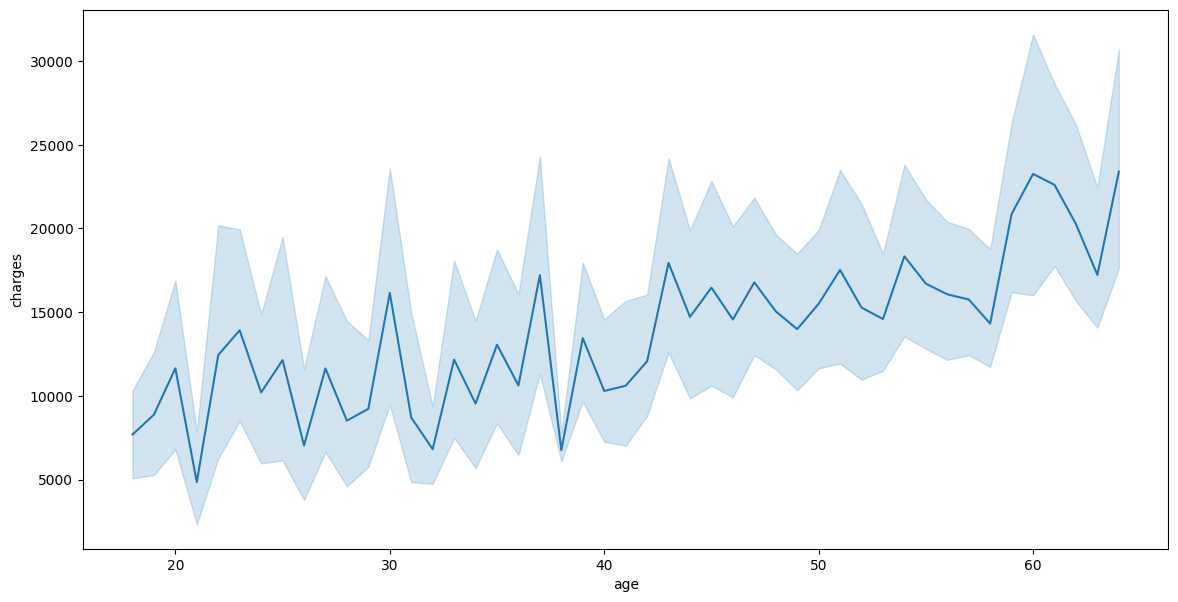

In [27]:
plt.figure(figsize=(14,7))
sns.lineplot(x='age', y='charges', data=df_train_copy, palette='Set3')

- Age is one of the primary factors influencing the life insurance premium rate, whether seeking a term or permanent policy.
- Typically, the premium amount increases average about 8% to 10% for every year of age;
- It can be as low as 5% annually if beneficiary is in 40s, and as high as 12% annually or if over age 50.

#### 3. BMI (Body Mass Index)

###### A. What is the median value of the bmi feature?

In [29]:
df_train_copy['bmi'].median()

30.2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13296\1030525664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_copy['bmi'], color='g')


<Axes: xlabel='bmi', ylabel='Density'>

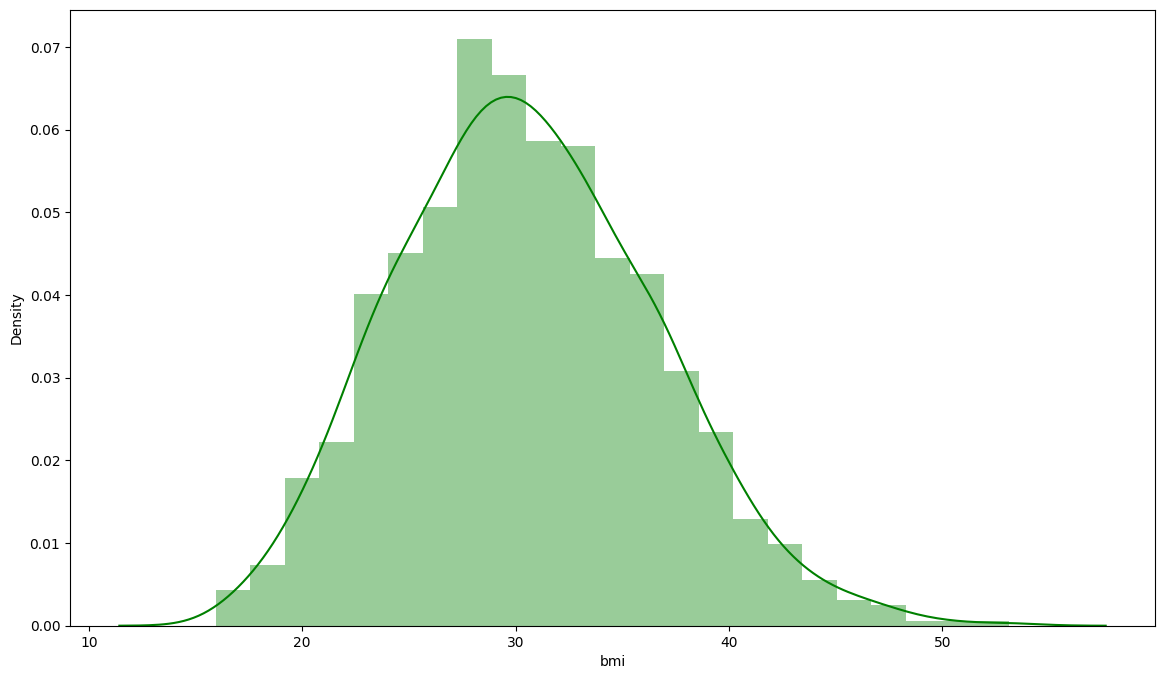

In [30]:
plt.figure(figsize=(14,8))
sns.distplot(df_train_copy['bmi'], color='g')

###### B. How BMI will affect medical insurance?

<Axes: xlabel='bmi', ylabel='charges'>

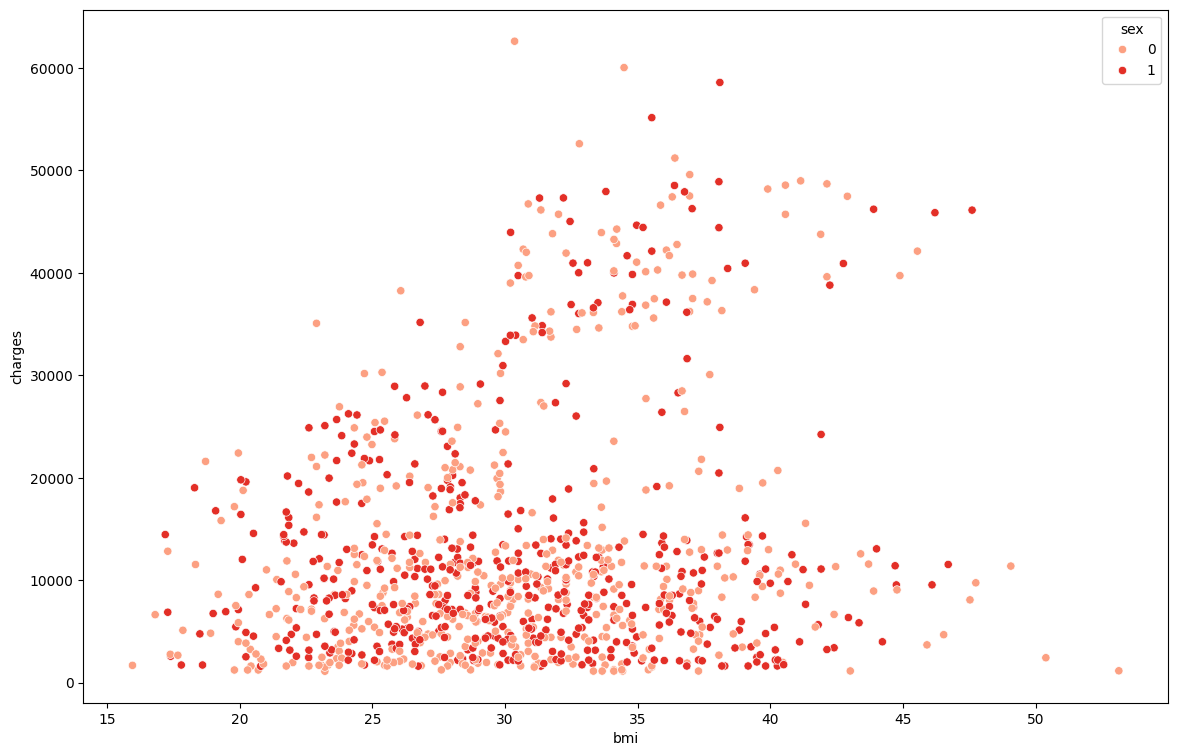

In [34]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df_train_copy, palette='Reds')

- A higher BMI means that the individual is at a higher risk of heart diseases and might frequently visit the hospitals due to weight-related issues.
- People with a body mass index (BMI) of 30 or higher can expect to pay more each month for health insurance. 
- In some cases,Health insurance for obese people costs 25 to 50 percent more than coverage for people with a BMI below 30.

#### 4. Gender

##### A. What's the gender ratio? 

In [ ]:
df_train_copy['sex'].value_counts()

In [ ]:
df_train_copy['sex'].value_counts().plot(kind='pie', 
                                         figsize=(16,7), autopct='%1.1f%%',
                                         explode=(0,0), fontsize=13)
plt.title('Gender Ratio', fontsize=20)

- The ratio of male (51%)gender is higher than female(49%)

#### 5. Smokers

###### A. What's percentage of smokers?

In [ ]:
df_train_copy['smoker'].value_counts()

In [ ]:
df_train_copy['smoker'].value_counts().plot(kind='pie', 
                                         figsize=(16,7), autopct='%1.1f%%',
                                         explode=(0,0), fontsize=13)
plt.title('Percentage of Smokers', fontsize=20)

#### 6. Charges

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13296\1066160408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_copy['charges'], color='r')


<Axes: xlabel='charges', ylabel='Density'>

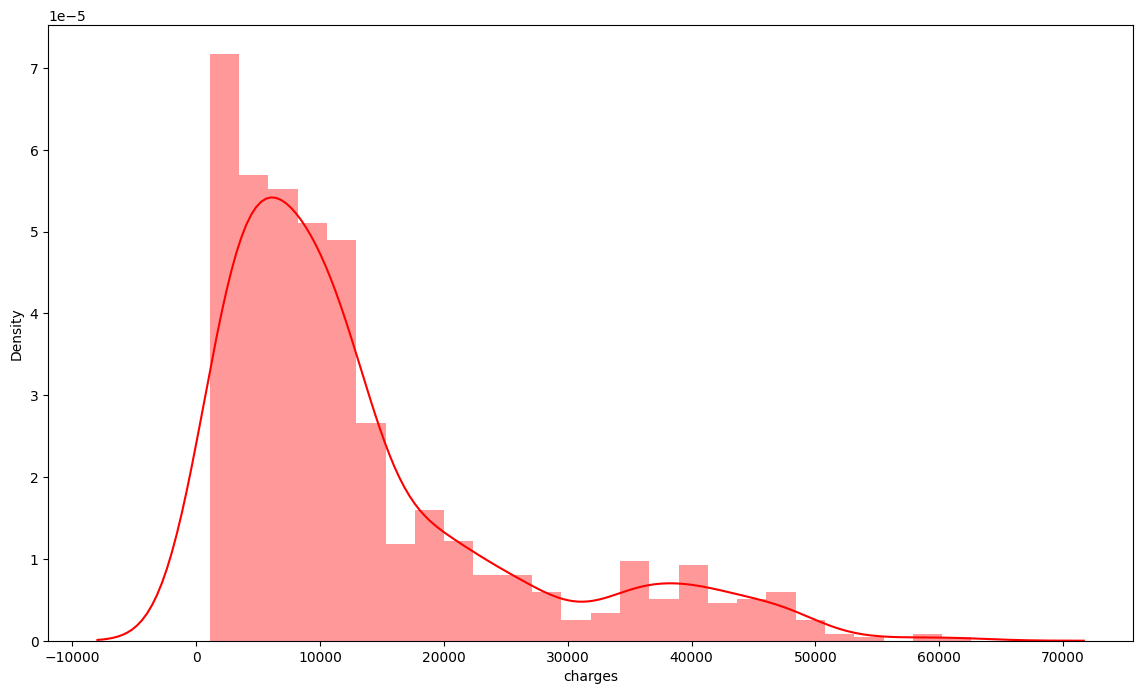

In [35]:
plt.figure(figsize=(14,8))
sns.distplot(df_train_copy['charges'], color='r')

<Axes: xlabel='smoker', ylabel='charges'>

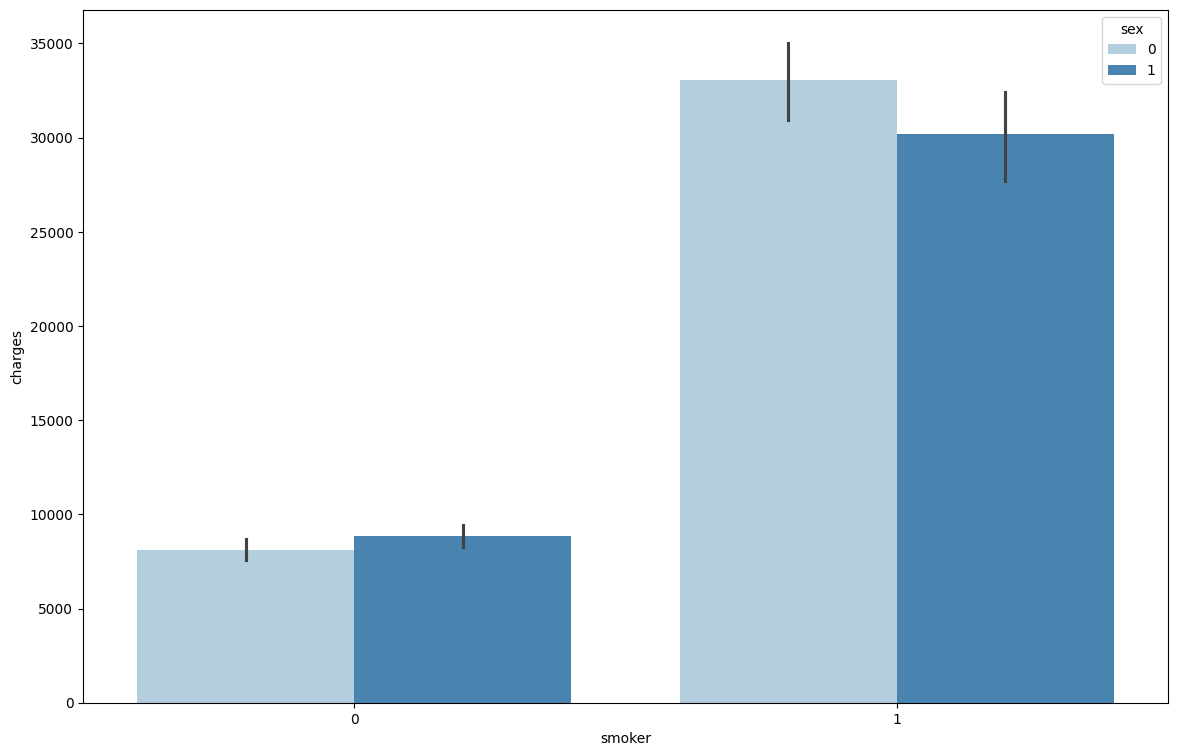

In [36]:
plt.figure(figsize=(14,9))
sns.barplot(x='smoker', y='charges', hue='sex', data=df_train_copy, palette='Blues')

- As smoking is highly related to health disorders, like cancer, heart disease, stroke, lung diseases, diabetes, and chronic obstructive pulmonary disease (COPD), which includes emphysema and chronic bronchitis. 
- Smoking also increases risk for tuberculosis, certain eye diseases, and problems of the immune system, including rheumatoid arthritis.
- Most of the health insurance companies are allowed to charge smokers up to 50% more for premiums. 

#### Overall Analysis
- Rising cost of medical treatment has been a significant rise in the number of people buying a health insurance policy. 
- Premium rates will be increased if the customer has high BMI. 
- People with high BMI are at risk of serious ailments, such as heart diseases, type 2 diabetes, breathing problems, hypertension, and cancer. 

#### Future Insights 
- Premium payments depends on type of health insurance cover the buyers choose. The premium amount will increase if the customers have purchased add-on covers.
- Individual or group insurance has low premium rate, while family floater has high premium rate. 

### Model Evalution 

###### Preparing X and y for training and testing 

In [ ]:
df_train.head()

###### Dropping least important feature of the dataset

In [ ]:
df_train = df_train.drop('region', axis=1)
df_train

###### Label encoding for “sex” and “smoker”

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
df_train['sex'] = le.fit_transform(df_train['sex'])
df_train['smoker'] = le.fit_transform(df_train['smoker'])

In [40]:
df_train.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,1,23.655,0,0,northwest,693,2352.96845
1,28,0,26.510,2,0,southeast,1297,4340.44090
2,51,1,39.700,1,0,southwest,634,9391.34600
3,47,1,36.080,1,1,southeast,1022,42211.13820
4,46,0,28.900,2,0,southwest,178,8823.27900


In [41]:
feature_cols = ['age','sex','bmi','children','smoker','id']
X = df_train[feature_cols]
X

,age,sex,bmi,children,smoker,id
0,24,1,23.655,0,0,693
1,28,0,26.510,2,0,1297
2,51,1,39.700,1,0,634
3,47,1,36.080,1,1,1022
4,46,0,28.900,2,0,178
...,...,...,...,...,...,...
998,18,0,31.350,4,0,1095
999,39,0,23.870,5,0,1130
1000,58,1,25.175,0,0,1294
1001,37,0,47.600,2,1,860


In [42]:
y = df_train['charges']
y

0        2352.96845
1        4340.44090
2        9391.34600
3       42211.13820
4        8823.27900
           ...     
998      4561.18850
999      8582.30230
1000    11931.12525
1001    46113.51100
1002    10214.63600
Name: charges, Length: 1003, dtype: float64

In [ ]:
y.head()

In [ ]:
print(X.shape)
print(y.shape)

###### Splitting Dataset into testing and training

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [45]:
X_train.head()

,age,sex,bmi,children,smoker,id
797,18,0,39.82,0,0,1248
767,42,0,26.18,1,0,800
932,20,0,31.46,0,0,815
742,48,0,35.91,1,0,658
995,60,0,28.70,1,0,466


In [46]:
X_test.head()

,age,sex,bmi,children,smoker,id
925,47,0,32.000,1,0,1076
923,53,0,26.600,0,0,216
700,30,1,35.300,0,1,19
87,40,1,34.105,1,0,325
881,50,1,36.200,0,0,870


In [47]:
y_train.head()

797     1633.96180
767     7046.72220
932     1877.92940
742    26392.26029
995    13224.69300
Name: charges, dtype: float64

In [ ]:
y_test.head()

###### Applying StandardScalar to X_train and y_test

In [48]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_train.columns

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###### Applying Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr

In [ ]:
lr.fit(X_train, y_train)

###### Interpreting Model Coefficients

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
feature_cols

In [50]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'id']

In [ ]:
coef = lr.coef_.tolist()
coef

In [ ]:
coef.insert(0,lr.intercept_)
coef

In [ ]:
eq1 = zip(feature_cols, coef)

for c1, c2 in eq1:
    print(c1,c2)

###### Using the Model for Prediction

In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
y_pred_train

In [ ]:
y_pred_test

In [ ]:
X_test

###### y = 13235.757551197006 + age * 3601.5401666170856 + sex * 127.25478304212501 + bmi * 1927.3318761341295 + children * 546.4395680810161 + smoker * 9678.806637558071 + id * 275.26348393926503

In [ ]:
y = 13235.757551197006 + (0.53889385 * 3601.5401666170856) + (-0.92796073 * 127.25478304212501) + (0.37232702 * 1927.3318761341295) + (-0.11773266 * 546.4395680810161) + (-0.5216818 * 9678.806637558071) + (1.06965852 * 275.26348393926503)
y

###### Model evaluation

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

In [ ]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for testing is {}'.format(MSE_test))

###### Model Evaluation using Rsquared value

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [ ]:
r2_score_train

In [ ]:
r2_score_test

In [ ]:
print('Rsquared value for training set is {}'.format(r2_score_train))
print('Rsquared for testing set is {}'.format(r2_score_test))

###### Applying Random Forest Regressor 

In [ ]:
df_train_copy.head()

In [ ]:
X_ = df_train_copy.drop('charges',axis=1).values
y_ = df_train_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

In [ ]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
y_pred_rf_train_

In [ ]:
y_pred_rf_test_ = rf_reg.predict(X_test_)
y_pred_rf_test_

In [ ]:
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

In [ ]:
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

In [ ]:
models = [('Linear Regression', r2_score_train, r2_score_test),
          ('Random Forest Regression', r2_score_rf_train_, r2_score_rf_test_)]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)'])
predict

In [ ]:
from pandas import read_excel
submission = pd.read_excel(r'C:/Users/INTEL/Downloads/sample_submission.csv.xlsx')
submission

In [ ]:
def UniqueResults(dataframe):
    df = pd.DataFrame()
    for col in dataframe:
        S=pd.Series(dataframe[col].unique())
        df[col]=S.values
    return df

In [ ]:
final_predictions = y_pred_test
final_predictions

In [ ]:
final_predictions_rf = y_pred_rf_test_
final_predictions_rf

In [ ]:
output_rf = {'id':df_test.index, 'charges':y_pred_rf_test_}
output_rf

In [ ]:
df_rf=pd.DataFrame.from_dict(output_rf, orient='index')
df_rf

In [ ]:
df_rf.transpose()

In [ ]:
file_rf= df_rf.transpose().to_csv('Medical Cost Prediction.csv', index=False, header=False)
file_rf

In [53]:
import matplotlib.pyplot as plt

# Visualize performance metrics
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1.0)
plt.gca().invert_yaxis()
plt.show()


NameError: name 'results_df' is not defined

<Figure size 1000x600 with 0 Axes>